In [27]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
import pandas as pd
import pydotplus
from IPython.display import Image
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
# sklearn.datasets 패키지
# -> 머신러닝 공부할때 거쳐가는 데이터셋 저장

# 1. 1976년 보스턴 집값 데이터: load_boston() 함수 호출 리턴
# 2. 불꽃 데이터: load_iris() 함수 호출시 리턴
# 3. 인디언 당뇨병 데이터: load_diabetes() 함수 호출시 리턴
# 4. 손글씨 숫자 이미지: load_digits() 함수 호출시 리턴
# 5. 운동데이터: load_

In [29]:
ir_dic = load_iris()

In [30]:
x = ir_dic["data"]

In [31]:
y = ir_dic['target']

In [32]:
rfc = RandomForestClassifier(n_estimators = 10)

In [33]:
y = ir_dic.target

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [35]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [36]:
rfc.estimators_[8]

DecisionTreeClassifier(max_features='auto', random_state=318699311)

In [37]:
dt_dot_data = tree.export_graphviz(rfc.estimators_[8],
                      feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'],
                      class_names = ['setosa', 'vrsicoloro','virsinica'])

In [38]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

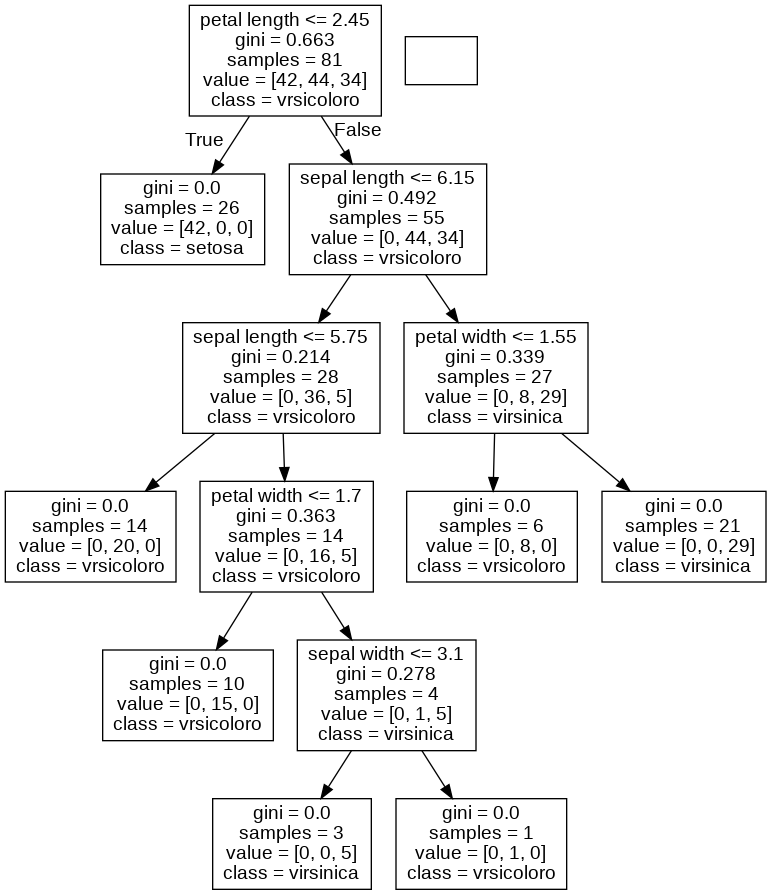

In [39]:
Image(dt_graph.create_png())

In [40]:
dt_graph.write_pdf("8번째 트리 고이고이 간직하리.pdf")

True

In [41]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [42]:
prediction = rfc.predict(X_test)

In [43]:
print(prediction == y_test)

[False  True  True  True  True  True False  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
print(confusion_matrix(y_test, prediction))

[[13  0  0]
 [ 0  7  0]
 [ 0  3  7]]


In [46]:
rfc.score(X_test, y_test)

0.9

In [47]:
print("Accuracy is :", accuracy_score(prediction, y_test))

Accuracy is : 0.9


In [48]:
print(classification_report(y_test, prediction))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.70      1.00      0.82         7
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.88        30
weighted avg       0.93      0.90      0.90        30



In [49]:
prediction

array([1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 0])

In [50]:
y_test

array([2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 0])

In [51]:
# precision(정밀도): 예측한 데이터 중 찐의 비율
# recall(재현율): 찐 중에서 올바르게 예측한 비율
# f1-score(F-Measure): Precision, Recall을 숫자하나로 계산
# f1-score = (2 * recall * precision) / (recall + precision)

In [73]:
clf_2 = RandomForestClassifier(
                               n_estimators = 200,
                               max_features = 4 ,
                               oob_score = True
                               )

In [74]:
clf_2.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=200, oob_score=True)

In [75]:
prediction_2 = clf_2.predict(X_test)

In [76]:
prediction_2

array([2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 1, 1,
       1, 0, 1, 0, 2, 1, 0, 1])

In [77]:
y_test

array([2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1,
       1, 0, 1, 0, 2, 1, 0, 1])

In [78]:
accuracy_score(y_test, prediction_2)

0.9333333333333333

In [79]:
classification_report(y_test, prediction_2)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         9\n           1       1.00      0.85      0.92        13\n           2       0.80      1.00      0.89         8\n\n    accuracy                           0.93        30\n   macro avg       0.93      0.95      0.94        30\nweighted avg       0.95      0.93      0.93        30\n'

In [80]:
print( classification_report(y_test, prediction_2) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.85      0.92        13
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



In [81]:
clf_2.feature_importances_

array([0.00411207, 0.01138657, 0.40436562, 0.58013574])

In [83]:
ir_dic.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [84]:
clf_2.feature_importances_

array([0.00411207, 0.01138657, 0.40436562, 0.58013574])

In [86]:
list(  zip(ir_dic.feature_names, clf_2.feature_importances_ ) )

[('sepal length (cm)', 0.004112071883462383),
 ('sepal width (cm)', 0.011386568228735796),
 ('petal length (cm)', 0.4043656200758456),
 ('petal width (cm)', 0.5801357398119562)]

In [89]:
for feature, imp in zip(ir_dic.feature_names, clf_2.feature_importances_ ):
  print("feature = ", feature)
  print("imp = ", imp)
  print("=" * 100)

feature =  sepal length (cm)
imp =  0.004112071883462383
feature =  sepal width (cm)
imp =  0.011386568228735796
feature =  petal length (cm)
imp =  0.4043656200758456
feature =  petal width (cm)
imp =  0.5801357398119562
